# Exploratory Data Analysis (EDA) and essay

### Introduction

This assignment focuses on one of the most important aspects of data science, Exploratory Data Analysis (EDA). Many surveys show that data scientists spend 60-80% of their time on data preparation. EDA allows you to identify data gaps & data imbalances, improve data quality, create better features and gain a deep understanding of your data before doing model training - and that ultimately helps train better models. In machine learning, there is a saying - "better data beats better algorithms" - meaning that it is more productive to spend time improving data quality than improving the code to train the model.

This will be an exploratory exercise, so feel free to show errors and warnings that arise during the analysis.

### Dataset
A Portuguese bank conducted a marketing campaign (phone calls) to predict if a client will subscribe to a term deposit  The records of their efforts are available in the form of a dataset. The objective here is to apply machine learning techniques to analyze the dataset and figure out most effective tactics that will help the bank in next campaign to persuade more customers to subscribe to the bank's term deposit. Download the Bank Marketing Dataset from: https://archive.ics.uci.edu/dataset/222/bank+marketing

### Assignment


#### Exploratory Data Analysis
- Review the structure and content of the data and answer questions such as:
- Are the features (columns) of your data correlated?
- What is the overall distribution of each variable?
- Are there any outliers present?
- What are the relationships between different variables?
- How are categorical variables distributed?
- Do any patterns or trends emerge in the data?
- What is the central tendency and spread of each variable?
- Are there any missing values and how significant are they? 

#### Algorithm Selection
Now you have completed the EDA, what Algorithms would suit the business purpose for the dataset. Answer questions such as:
- Select two or more machine learning algorithms presented so far that could be used to train a model (no need to train models - I am only looking for your recommendations).
- What are the pros and cons of each algorithm you selected?
- Which algorithm would you recommend, and why?
- Are there labels in your data? Did that impact your choice of algorithm?
- How does your choice of algorithm relates to the dataset?
- Would your choice of algorithm change if there were fewer than 1,000 data records, and why? 

#### Pre-processing
Now you have done an EDA and selected an Algorithm, what pre-processing (if any) would you require for:
- Data Cleaning - improve data quality, address missing data, etc.
- Dimensionality Reduction - remove correlated/redundant data than will slow down training
- Feature Engineering - use of business knowledge to create new features
- Sampling Data - using sampling to resize datasets
- Data Transformation - regularization, normalization, handling categorical variables
- Imbalanced Data - reducing the imbalance between classes
- Deliverable

#### Essay (minimum 500 words)
Write a short essay summarizing your findings. Explain your selection of algorithms and how they relate to the data and what you are trying to do.
Format: PDF

#### Code
This should include your code, as well as the outputs of your code e.g. correlation chart
Format: Code should be saved in https://rpubs.com or https://github.com. Please provide a link to your code repo in the submission. Please do not submit your code via Google Colab (due to permissioning issues).

## Starting Assignment - Code Below

#### Reading in the data

In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
# X = bank_marketing.data.features 
# y = bank_marketing.data.targets 

#### Meta data / Data Dict

In [3]:
# Reviewing the metadata 
pretty_meta = json.dumps(bank_marketing.metadata, indent=4)
# print(pretty_meta)

## Notes:
 # - The classification goal is to predict if the client will subscribe a term deposit (variable y).
 # - 16 different features and some are categorical other continuous integers
 # - Demographic info: "Age", "Occupation",  "Marital Status",  "Education Level"
 # - year is 2014

In [4]:
## Reviewing the Data Dict 
print(bank_marketing.metadata['additional_info']['variable_info'])

Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   5 - default: has credit in default? (binary: "yes","no")
   6 - balance: average yearly balance, in euros (numeric) 
   7 - housing: has housing loan? (binary: "yes","no")
   8 - loan: has personal loan? (binary: "yes","no")
   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
  10 - day: last contact day of the month (numeric)
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "no

In [5]:
## Putting it in one DF 
raw_data_df_x = bank_marketing['data']["features"]
raw_data_df_y = bank_marketing['data']["targets"]
raw_df = pd.concat([raw_data_df_x, raw_data_df_y], axis=1)

In [6]:
## Basic Pandas Examination Functions
print('PD Describe:')
print(raw_df.describe())
print("\n----------\n")
print('PD Info:')
print(raw_df.info())

PD Describe:
                age        balance   day_of_week      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.0

#### Plotting the Features to look at distributions and nulls.

In [7]:
### Custom functions for plotting different feature types.
def distribution_plots(col, mode ='Integer'):
    if mode == 'Integer':   
        # Histogram PLot
        plt.hist(raw_df[col].dropna(), bins=30, edgecolor='black')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(axis='y', alpha=0.75)
        plt.show()
        
        # Boxplot Plot
        plt.boxplot(raw_df[col].dropna(), vert=False)
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.grid(axis='x', alpha=0.75)
        plt.show()
    if mode == "Categorical":
        raw_df[col].value_counts(dropna=False).plot(kind='bar', color='skyblue', edgecolor='black')
        plt.title(f'Count Plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()
    if mode == "Binary":
        raw_df[col].value_counts(dropna=False).plot(
            kind='bar', color=['steelblue', 'orange'], edgecolor='black'
        )
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=0)
        plt.grid(axis='y', alpha=0.75)
        plt.tight_layout()
        plt.show()

In [8]:
## The Dataframe has 45,211 rows. This means that this many individuals contacted via
## Custom printing of the break down for each Relevant Feature based on type of feature.
# More variable information 
var_df = bank_marketing.variables
# print(var_df)
int_vars = var_df[var_df['type']=='Integer']
cat_vars = var_df[var_df['type']=='Categorical']
bin_vars = var_df[var_df['type']=='Binary']
miss_tbl = raw_df.isna().sum().to_frame('missing_count').reset_index()

----------------------age-----------------------
Column age is int and has a range of 18 through 95, with an average of 40.94.


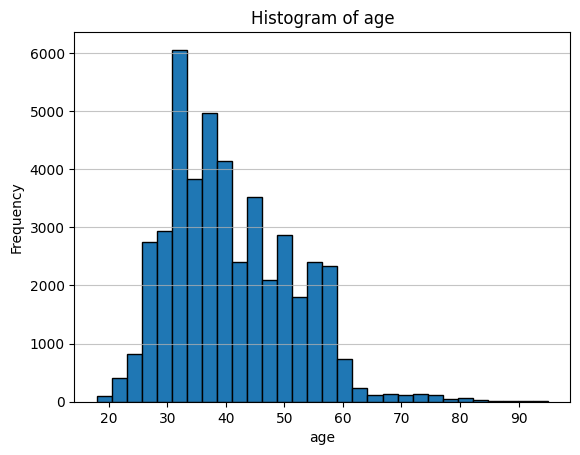

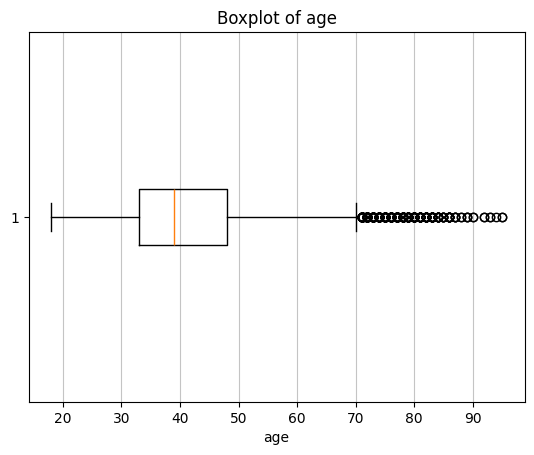

This feature had 0 null values, or 0.0 percent null values.
----------------------job-----------------------
Column job is categorical and has the following unique values: ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']


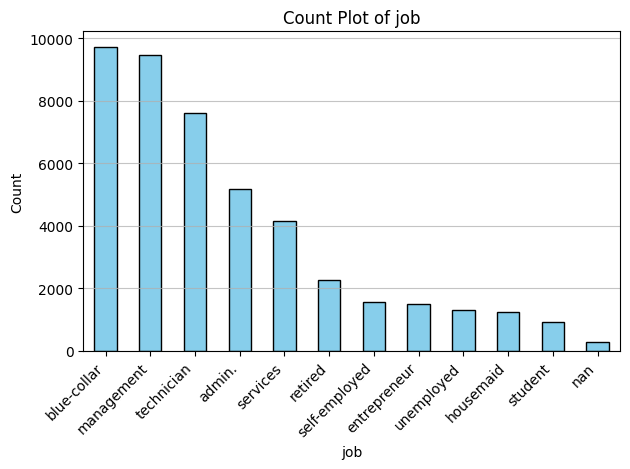

This feature had 288 null values, or 0.64 percent null values.
----------------------marital-----------------------
Column marital is categorical and has the following unique values: ['married' 'single' 'divorced']


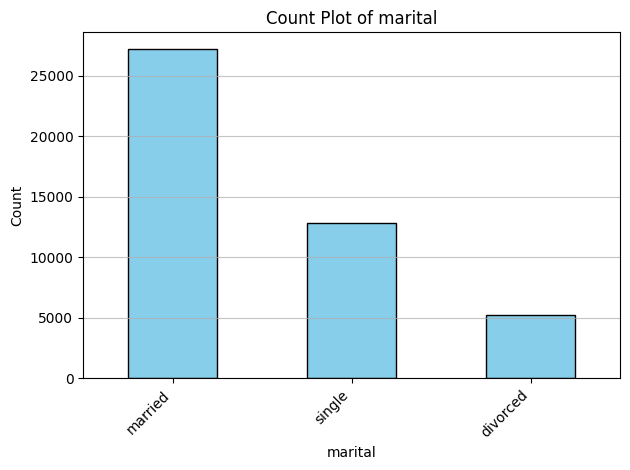

This feature had 0 null values, or 0.0 percent null values.
----------------------education-----------------------
Column education is categorical and has the following unique values: ['tertiary' 'secondary' nan 'primary']


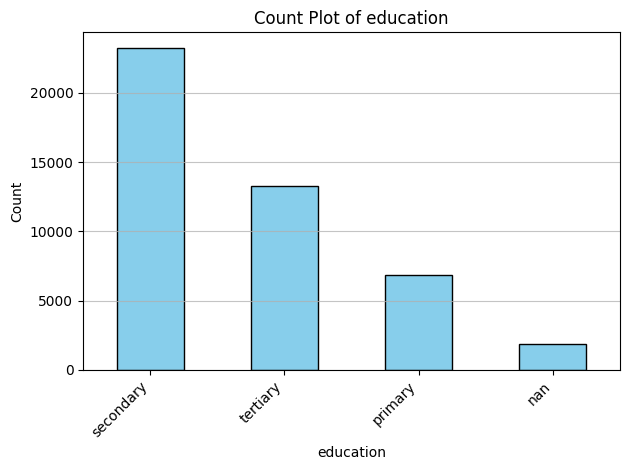

This feature had 1857 null values, or 4.11 percent null values.
----------------------default-----------------------
Column default is with 815 (1.8%) being 'yes' 
        and 44396 (98.2%) being being 'no'. 


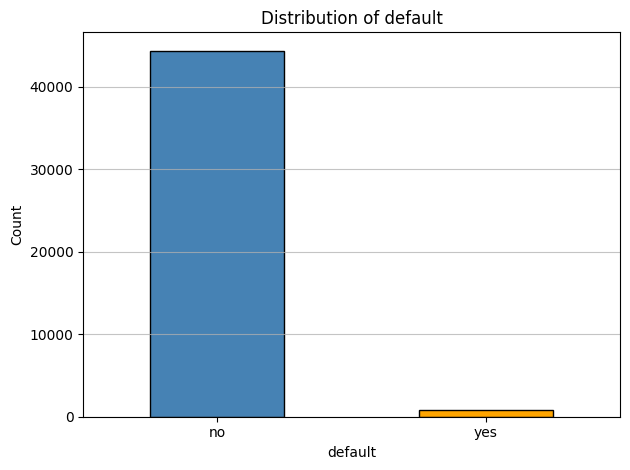

This feature had 0 null values, or 0.0 percent null values.
----------------------balance-----------------------
Column balance is int and has a range of -8019 through 102127, with an average of 1362.27.


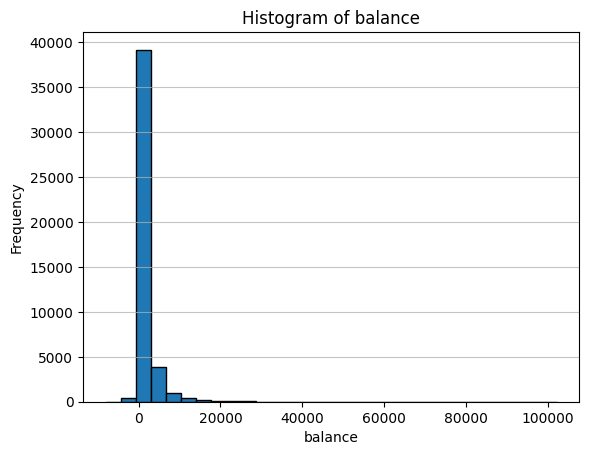

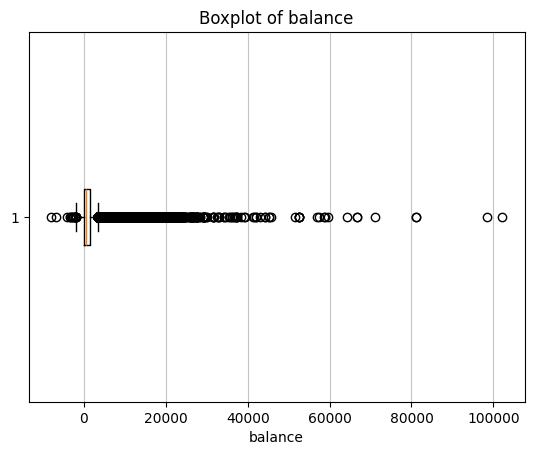

This feature had 0 null values, or 0.0 percent null values.
----------------------housing-----------------------
Column housing is with 25130 (55.58%) being 'yes' 
        and 20081 (44.42%) being being 'no'. 


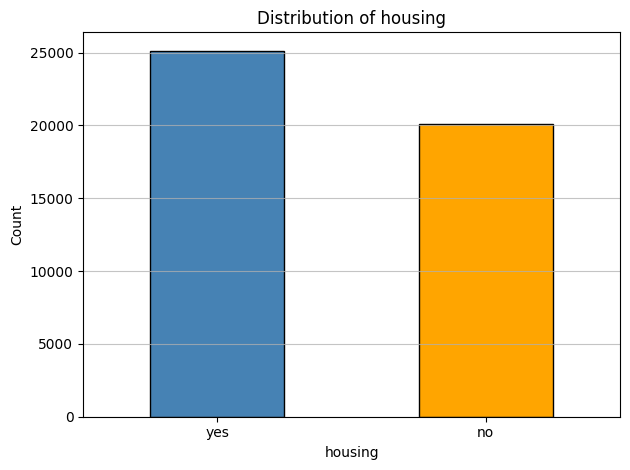

This feature had 0 null values, or 0.0 percent null values.
----------------------loan-----------------------
Column loan is with 7244 (16.02%) being 'yes' 
        and 37967 (83.98%) being being 'no'. 


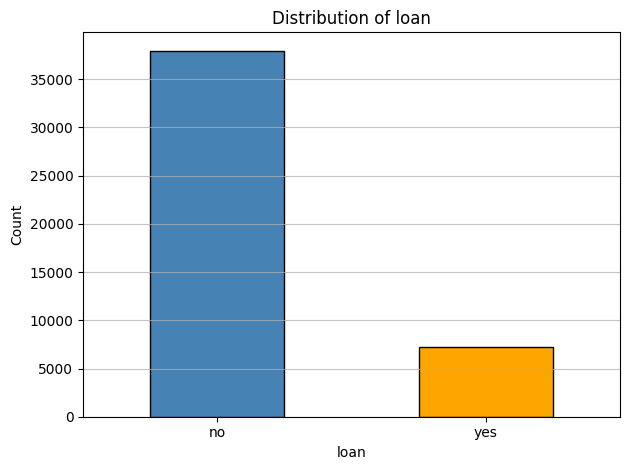

This feature had 0 null values, or 0.0 percent null values.
----------------------contact-----------------------
Column contact is categorical and has the following unique values: [nan 'cellular' 'telephone']


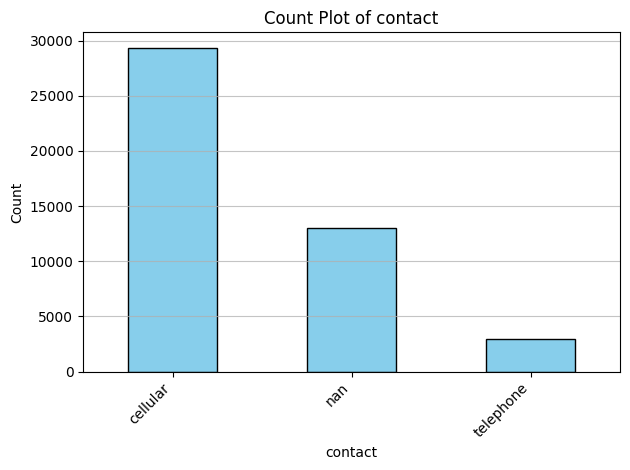

This feature had 13020 null values, or 28.8 percent null values.
----------------------day_of_week-----------------------
This feature had 0 null values, or 0.0 percent null values.
----------------------month-----------------------
This feature had 0 null values, or 0.0 percent null values.
----------------------duration-----------------------
Column duration is int and has a range of 0 through 4918, with an average of 258.16.


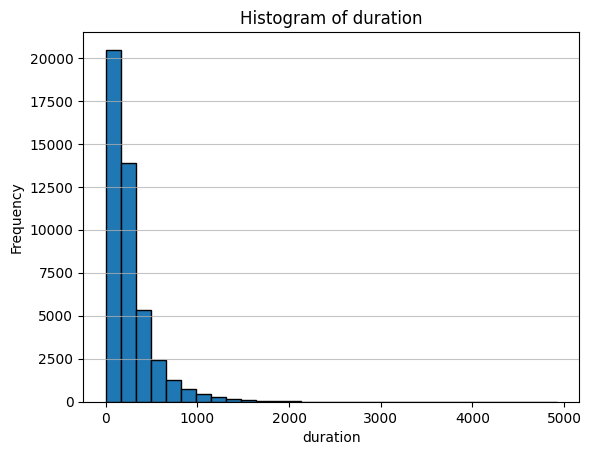

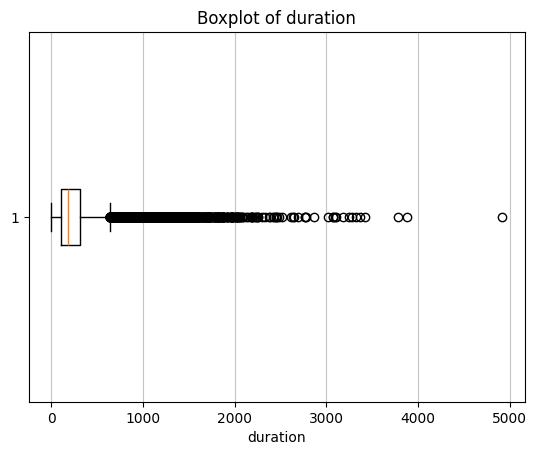

This feature had 0 null values, or 0.0 percent null values.
----------------------campaign-----------------------
Column campaign is int and has a range of 1 through 63, with an average of 2.76.


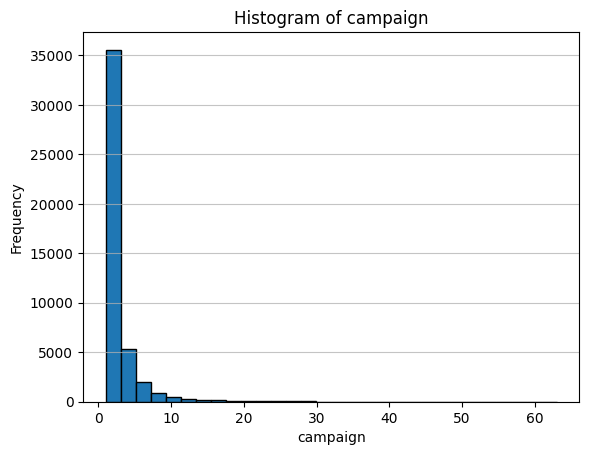

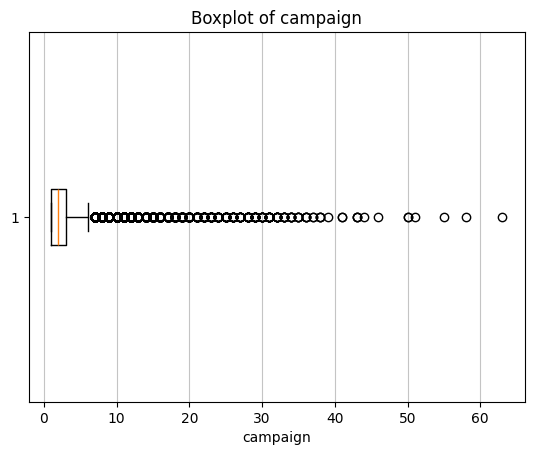

This feature had 0 null values, or 0.0 percent null values.
----------------------pdays-----------------------
Column pdays is int and has a range of -1 through 871, with an average of 40.2.


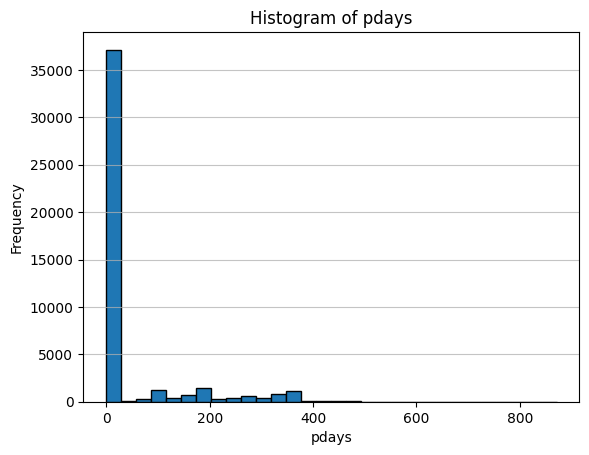

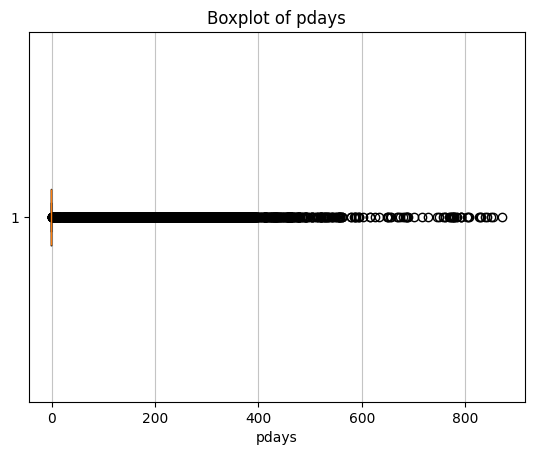

This feature had 0 null values, or 0.0 percent null values.
----------------------previous-----------------------
Column previous is int and has a range of 0 through 275, with an average of 0.58.


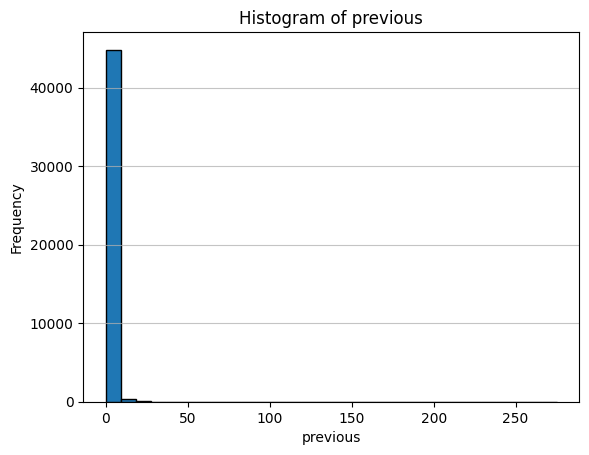

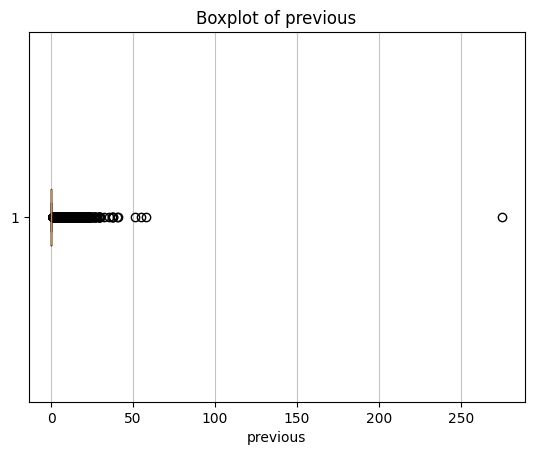

This feature had 0 null values, or 0.0 percent null values.
----------------------poutcome-----------------------
Column poutcome is categorical and has the following unique values: [nan 'failure' 'other' 'success']


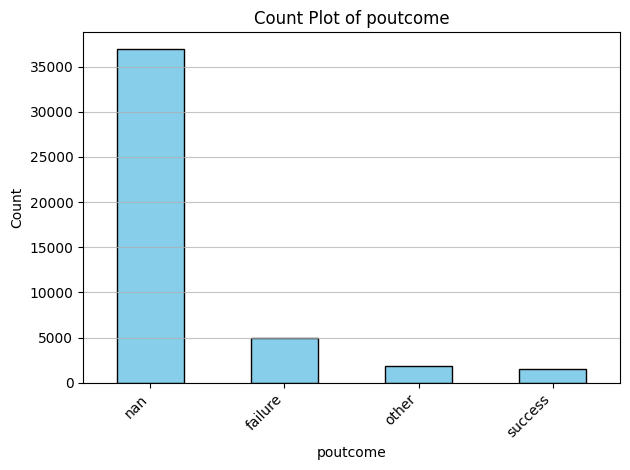

This feature had 36959 null values, or 81.75 percent null values.
----------------------y-----------------------
Column y is with 5289 (11.7%) being 'yes' 
        and 39922 (88.3%) being being 'no'. 


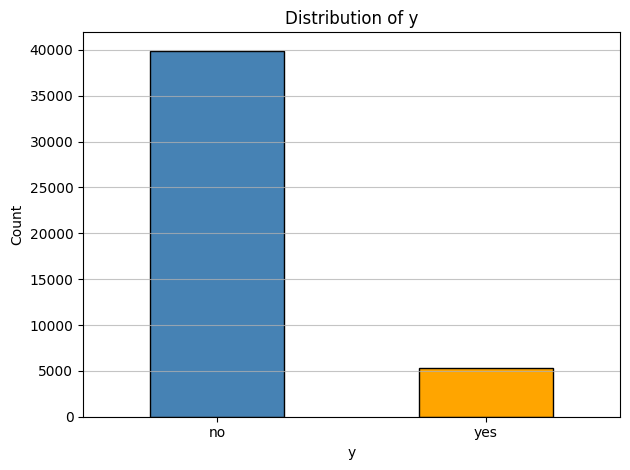

This feature had 0 null values, or 0.0 percent null values.


In [9]:
## Printing Uniform output
for feature in raw_df.columns:
    print(f"----------------------{feature}-----------------------")
    if feature in int_vars['name'].unique():
        print(f"Column {feature} is int and has a range of {raw_df[feature].min()} through {raw_df[feature].max()}, with an average of {round(raw_df[feature].mean(),2)}.")
        distribution_plots(feature, mode ='Integer')
    if feature in cat_vars['name'].unique():
        print(f"Column {feature} is categorical and has the following unique values: {raw_df[feature].unique()}")
        distribution_plots(feature, mode ='Categorical')
    if feature in bin_vars['name'].unique():
        print(f"""Column {feature} is with {raw_df[raw_df[feature]=='yes'].shape[0]} ({round((raw_df[raw_df[feature]=='yes'].shape[0]/raw_df.shape[0])*100,2)}%) being 'yes' 
        and {raw_df[raw_df[feature]=='no'].shape[0]} ({round((raw_df[raw_df[feature]=='no'].shape[0]/raw_df.shape[0])*100,2)}%) being being 'no'. """)
        distribution_plots(feature, mode ='Binary')
    print(f"""This feature had {miss_tbl['missing_count'][miss_tbl['index']==feature].values[0]} null values, or {round((miss_tbl['missing_count'][miss_tbl['index']==feature].values[0]/raw_df.shape[0])*100,2)} percent null values.""")


#### Notes on the variables based on the above output.
Not looking at date columns, although may have value if converted to non-date format. (Month a categorical var & day of month continuous)


##### Age
- continueous
- slightly right skewed, most people are between 30 and 50
- longer tail after 60 (60+)
- Range is 18 to 95; Average value 40.94
- interquartlie range is about 33 to 48
- no null values
##### Job
- categorical
- largest counts are blue collar, management, technician. these are most dominant, long tail of other categories.
- 288 missing values (~0.64%)
##### Marital
- most married, single second, divorced third
- no nulls
##### Education
- secondary education is the most common, followed by tertiary and then primary
- 1,857 nulls values (~4.11%)
- few distinct categories, no long tails
##### Default
- 815 (1.8%) being 'yes' and 44396 (98.2%) being being 'no'
- no nulls
- super imbalanced
##### balance
- extremely right skewed
- upper level outliers, over drawn (negative) outliers too
- no nulls
- range: -8,819 to 102,127; average 1,362.27
- may need transform
##### housing
- majority 5130 (55.58%) being 'yes' with housing loan, and 20081 (44.42%) being being 'no'
- binary
- no nulls
##### loan
- 7244 (16.02%) being 'yes' and 37967 (83.98%) being being 'no'
- no null
- binary
- imbalanced toward no
##### contact
- mostly cellular
- 13020 null values, or 28.8 percent null values
- probably shouldnt be imputed, maybe just 'unknown' because so high of nulls
##### duration
- no nulls
- Range 0 to 4,918; Average: 258.16
- strong right skew, outliers on the upper threshold of the data. Long upper tail.
- this is not something that is known before call is made, so not a good predictor.
##### campaign
- strong right skewed, 
- Range: 1 to 63; Average 2.76 times of contact
- many upper outliers
- no nulls
##### pdays
- heavily aroudn zero / low digits
- long tail of upper outliers
- no nulls
- neg 1 is that they were not previous contacted. So partially categorical. Should this be mered with previous feature in some way.
##### previous
- Range: 0 to 275; Average 0.58 days
- no nulls
- most have not been contacted (clustered around 0)
- extreme right skew
##### poutcome
- 36959 null values, or 81.75 percent null values
- need to process and regoup, nulls to be made "not prev contacted"


### Pair plot with all of the variables

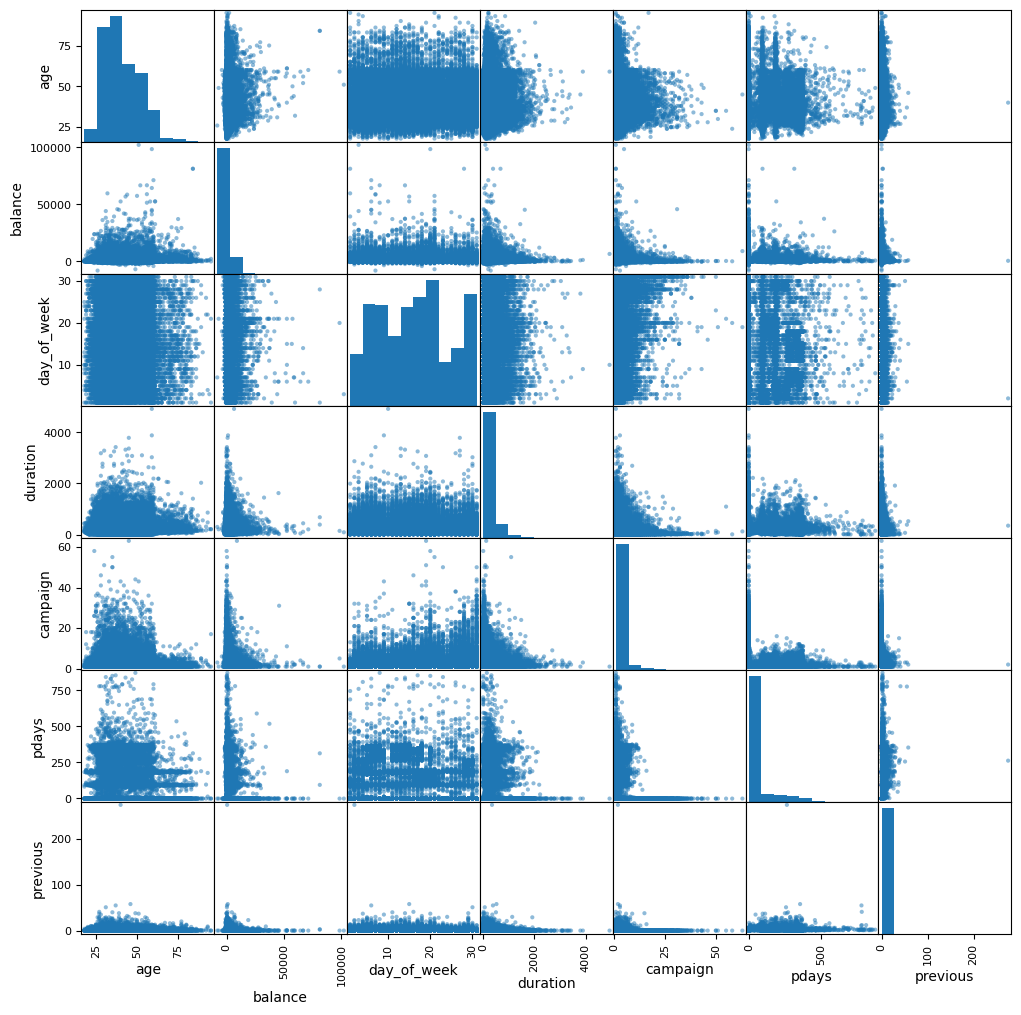

In [10]:
### Doing a pair plot after those with 3+ nulls were removed 
scatter_matrix(raw_df, figsize=(12, 12), diagonal='hist')
plt.show()


<Axes: >

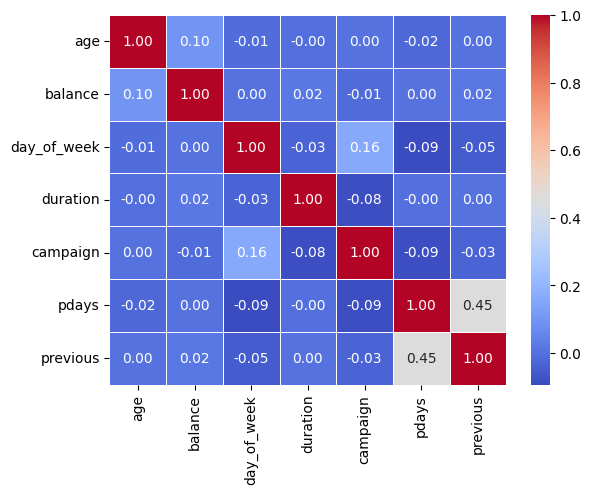

In [30]:
## Correlations
corr_matrix = raw_df[[i for i in raw_df.columns if i != 'missing_count']].select_dtypes(include=['number']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

#### Notes on any relationships noticed in the pairplot & correlation matrix
- age seems to have direct relationship with balance, duration, campaign and pdays
- balance seems to have negative relationship with duration, campaign, pdays,previous
- duration has a negative relationship with campagin, pdays, and previous
- Most of hese slight relationships that i visually identified in the pairplot do not seem to hold up in the correlatino plot.
- The age and balance relationship is small, but present.
- not worried about multicollinearity

In [ ]:
## Dating with Date Columns (DONT THINK I NEED)
# According to metadata  "day of week" is actually day of month, so making full date columns appropriately
# month_map = {'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
# mon = raw_df['month'].str.strip().str[:3].str.lower().map(month_map)
# raw_df['full_date'] = pd.to_datetime(dict(year=np.full(len(raw_df), 2014), month=mon, day=raw_df['day_of_week']))

#### Looking at the nulls in the df, and the number of them per row where they exist

In [13]:
### checking the nuils, are they in the same rows, or are they in different rows accross features. 

## I want to see if the nulls are grouped together in with a sepcfici subset of contacted clients
miss_tbl[miss_tbl["missing_count"]!=0]

,index,missing_count
1,job,288
3,education,1857
8,contact,13020
15,poutcome,36959


In [14]:
### checking the nuils, are they in the same rows, or are they in different rows accross features. 
# Count how many features are null in each row
raw_df['missing_count'] = raw_df[miss_tbl['index'][miss_tbl["missing_count"]!=0].unique()].isnull().sum(axis=1)

# Filter rows where there is at least 1 missing value
# miss_tbl = raw_df[raw_df['missing_count'] > 0]
print(len(raw_df))
# Display summary
print("THose that have one null in the row from the potentially null features. ")
print(raw_df[raw_df['missing_count']==1].shape[0])
print(round((raw_df[raw_df['missing_count']==1].shape[0]/len(raw_df))*100,2),"% of rows")
print("THose that have 2 nulls in the row from the potentially null features. ")
print(raw_df[raw_df['missing_count']==2].shape[0])
print(round((raw_df[raw_df['missing_count']==2].shape[0]/len(raw_df))*100,2),"% of rows")
print("THose that have 3 or more nulls in the row from the potentially null features. ")
print(raw_df[raw_df['missing_count']>=3].shape[0])
print(round((raw_df[raw_df['missing_count']>=3].shape[0]/len(raw_df))*100,2),"% of rows")


### Because of the imbalanced outcome for Y, i want to look at if these nulls eat into the 'No' or "Yes:


45211
THose that have one null in the row from the potentially null features. 
23459
51.89 % of rows
THose that have 2 nulls in the row from the potentially null features. 
13119
29.02 % of rows
THose that have 3 or more nulls in the row from the potentially null features. 
791
1.75 % of rows


- For those rows that have 3 or more nulls, we can drop them.
- This means were dropping about 1.75% of the data;s rows.
- However, its better to do this because this amount of nulls in one row may throw the model.
- For those than have 2 or less nulls in a row can be imputed. 


In [36]:
### After dropping the rows with 3+ nulls what are the updated percentages. 
raw_df_dropped = raw_df[raw_df['missing_count']<3]
print("THose that have one null in the row from the potentially null features. ")
print(raw_df_dropped[raw_df_dropped['missing_count']==1].shape[0])
print(round((raw_df_dropped[raw_df_dropped['missing_count']==1].shape[0]/len(raw_df_dropped))*100,2),"% of rows")
print("THose that have 2 nulls in the row from the potentially null features. ")
print(raw_df_dropped[raw_df_dropped['missing_count']==2].shape[0])
print(round((raw_df_dropped[raw_df_dropped['missing_count']==2].shape[0]/len(raw_df_dropped))*100,2),"% of rows")
print("THose that have 3 or more nulls in the row from the potentially null features. ")
print(raw_df_dropped[raw_df_dropped['missing_count']>=3].shape[0])
print(round((raw_df_dropped[raw_df_dropped['missing_count']>=3].shape[0]/len(raw_df_dropped))*100,2),"% of rows")


THose that have one null in the row from the potentially null features. 
23459
52.81 % of rows
THose that have 2 nulls in the row from the potentially null features. 
13119
29.53 % of rows
THose that have 3 or more nulls in the row from the potentially null features. 
0
0.0 % of rows


- So 52.8% of rows have one null, these can be imputed. Roughly 30% have 2 nulls. 

In [18]:
### Looking at all nulls left after the rows with 3 Plus removed.
grouped = raw_df_dropped.groupby('y').agg(
    total_rows=('age', 'count'),     
    null_job=('job', lambda x: x.isnull().sum()),
    null_education=('education', lambda x: x.isnull().sum()),
    null_contact=('contact', lambda x: x.isnull().sum())).reset_index()
grouped["pct_nulls_job"] = round((grouped["null_job"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_contact"] = round((grouped["null_contact"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_education"] = round((grouped["null_education"]/grouped["total_rows"])*100,2)
grouped[["y","pct_nulls_job","pct_nulls_contact","pct_nulls_education"]]

,y,pct_nulls_job,pct_nulls_contact,pct_nulls_education
0,no,0.24,30.08,2.3
1,yes,0.40,9.68,4.2


In [19]:
### looking at this again but only for those where rows have a single null value. 
grouped = raw_df_dropped[raw_df_dropped['missing_count']==1].groupby('y').agg(
    total_rows=('age', 'count'),     
    null_job=('job', lambda x: x.isnull().sum()),
    null_education=('education', lambda x: x.isnull().sum()),
    null_contact=('contact', lambda x: x.isnull().sum())).reset_index()
grouped["pct_nulls_job"] = round((grouped["null_job"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_contact"] = round((grouped["null_contact"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_education"] = round((grouped["null_education"]/grouped["total_rows"])*100,2)
grouped[["y","pct_nulls_job","pct_nulls_contact","pct_nulls_education"]]


,y,pct_nulls_job,pct_nulls_contact,pct_nulls_education
0,no,0.06,0.26,1.06
1,yes,0.35,0.39,3.14


In [20]:
### looking at this again but only for those where rows have 2 null values. 
grouped = raw_df_dropped[raw_df_dropped['missing_count']==2].groupby('y').agg(
    total_rows=('age', 'count'),     
    null_job=('job', lambda x: x.isnull().sum()),
    null_education=('education', lambda x: x.isnull().sum()),
    null_contact=('contact', lambda x: x.isnull().sum())).reset_index()
grouped["pct_nulls_job"] = round((grouped["null_job"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_contact"] = round((grouped["null_contact"]/grouped["total_rows"])*100,2)
grouped["pct_nulls_education"] = round((grouped["null_education"]/grouped["total_rows"])*100,2)
grouped[["y","pct_nulls_job","pct_nulls_contact","pct_nulls_education"]]

#The nulls in both Jobs and the Educations are disproportunate to those that have Y yess values, which is already in the minority.
## This may impact the prediciton for classifications. 

,y,pct_nulls_job,pct_nulls_contact,pct_nulls_education
0,no,0.66,93.94,5.48
1,yes,1.74,78.55,20.82


### Contemplating Processing and Cleaning Steps

- There are several features with nulls, such as job, education, contact, and poutcome. Where these nulls exist in the same row, so for those where  multiple missing values are an issue, those rows will be removed to keep the dataset reliable. THis means 3+ nulls in one row will be removed.
- Other nulls, where the row has 2 or less nulls will be imputed. For example, job and education will be filled with either the most common value or labeled as "unknown". For poutcome, missing values will be given a label of "no_previous_contact" to make it clear that there was no earlier campaign contact.
- The duration column will be dropped. It represents the length of the call and would only be known after the call has ended. Not a good predictive feature.
- Categorical features like job, marital, month, and poutcome should be converted into numbers for the model. This will be done through label encoding or one-hot encoding. For instance, the category of job is heavily skewed towards blue-collar, management, technician and admin. All of the other cateogries would be placed into an "other"  category and then encoded.
- The continuoue variables will need to be transformed so as to obtain a bit more of a normal distribution if using regression, or scaled otherwise. This is to prevent warping of the results.
- The possibility of making new features / columns in order to properly capture variables looking at similar dimensions of the data should be explored. For instance, pdays, which has a value of -1 for those that were not contacted may be merged with "previous" in order to derive a more straight forward metric like a binary "previously_contacted" flag. This feature engineering would also be considered some dimensionality reduction. 
- The y values are extremely imbalanced. We would need to take action in order to ensure that the model does not always classify a no. We could double the amount of 'yes' values in the data in order to help distribute the values. This oversampling in the training data would help adjust for these results in the models predictions. 

#### Data Cleaning and Processing Code Examples

In [37]:
## DataFrame with those with 3+ nulls in a row dropped
# raw_df_dropped

## Removing the missing count column after using it for limited dt
raw_df_dropped = raw_df_dropped.drop(columns=["missing_count"])

## Dropping the duration column because not a predictive metric.
raw_df_dropped = raw_df_dropped.drop(columns=["duration"])

## Filling in the NUlls with Unknown or No Previous Contant values. Removing the nulls via imputation of other categories. 
raw_df_dropped["job"] = raw_df_dropped["job"].fillna("unknown")
raw_df_dropped["education"] = raw_df_dropped["education"].fillna("unknown")
raw_df_dropped["contact"] = raw_df_dropped["contact"].fillna("unknown")
raw_df_dropped["poutcome"] = raw_df_dropped["poutcome"].fillna("no_previous_contact")

## making pdays and previous into additional binary flag
raw_df_dropped["previously_contacted"] = np.where((raw_df_dropped["pdays"] != -1) | (raw_df_dropped["previous"] > 0), "yes", "no")
raw_df_dropped = raw_df_dropped.drop(columns=["pdays"])

## simplyfying job categories 
raw_df_dropped["job"][~raw_df_dropped["job"].isin(["blue-collar", "management", "technician", "admin."])]="other"

## Encoding the categorical vars
df_encoded = pd.get_dummies(raw_df_dropped, columns=["job","marital","education","default","housing","loan","contact","poutcome"], drop_first=True)


# Separating Vars and making y binary 
y = df_encoded["y"].map({"yes": 1, "no": 0})
X = df_encoded.drop(columns=["y"])

C:\Users\johnf\AppData\Local\Temp\ipykernel_54640\1542333757.py:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  raw_df_dropped["job"][~raw_df_dropped["job"].isin(["blue-collar", "management", "technician", "admin."])]="other"
C:\Users\john

### Contemplating Model Selection

- We have learned several modeling techniques so far, including KNN, Discriminant Analysis (LDA and QDA), Naive Bayes, and Random Forest. 
- Our labeled dataset contains a mix of categorical and continuous variables across many features, some of which are heavily skewed and not normally distributed.
- Logistic Regression could work if we carefully transform and scale the continuous variables and encode categorical variables properly. However, it assumes linear relationships between features and the target, which may not fully capture the complexity of this dataset.
- KNN is not a good choice because of the high number of features and the mix of variable types, which it does not handle well. In addition, the target variable is imbalanced, and KNN tends to perform poorly with imbalanced data.
- Discriminant Analysis (LDA and QDA) is also not ideal. While QDA might be more suitable due to differing covariance between features, both methods assume normally distributed continuous variables and do not handle categorical data well, which is a significant issue for this dataset.
- Naive Bayes is a poor fit because it assumes feature independence, which is unrealistic here. For example, education and job type are likely dependent on one another, and this relationship violates the model’s core assumption.
- Random Forest is the most practical choice, as it can handle both skewed continuous variables and categorical variables with minimal preprocessing. While it is less interpretable than simpler models like Logistic Regression, the extra preprocessing required by other models reduces their interpretability as well, making Random Forest a strong overall option.
                                                                   